# Getting started with pandas

In [1]:
from pandas import Series, DataFrame
import pandas as pd

In [2]:
from __future__ import division
from numpy.random import randn
import numpy as np
import os
import matplotlib.pyplot as plt
np.random.seed(12345)
plt.rc('figure', figsize=(10, 6))
from pandas import Series, DataFrame
import pandas as pd
np.set_printoptions(precision=4)

In [13]:
%pwd

'C:\\Users\\user\\Dropbox\\04KPUWork-202208부터노션사용\\10 강의\\10 강의-202102학기\\04 파이썬\\03 강의와실습자료\\Ch11-Pandas'

## 5.1 Introduction to pandas data structures

### 5.1.1 Series

#### o 객체저장 1차원 자료구조
#### o NumPy 자료형 모두 저장 가능
#### o Index라는 배열색인을 이름 보유
##### - 기본: 정수(0~(N-1))

In [14]:
obj = Series([4, 7, -5, 3])
obj

0    4
1    7
2   -5
3    3
dtype: int64

##### - values 와 index의 저장

In [15]:
obj.values

array([ 4,  7, -5,  3], dtype=int64)

In [16]:
obj.index

RangeIndex(start=0, stop=4, step=1)

##### o정수외의 다른 인덱스 사용

In [17]:
obj2 = Series([4, 7, -5, 3], index=['d', 'b', 'a', 'c'])
obj2

d    4
b    7
a   -5
c    3
dtype: int64

In [18]:
obj2.index

Index(['d', 'b', 'a', 'c'], dtype='object')

##### o Index 값을 이용한 값의 조회
###### - 인덱스1개
###### - 인덱스 리스트

In [19]:
obj2['a']

-5

In [20]:
obj2['d'] = 6
obj2[['c', 'a', 'd']]

c    3
a   -5
d    6
dtype: int64

##### - 조건식, 산술식 적용가능

In [21]:
# obj2 > 0
obj2[obj2 > 0]

d    6
b    7
c    3
dtype: int64

In [22]:
obj2 * 2

d    12
b    14
a   -10
c     6
dtype: int64

In [23]:
np.exp(obj2)

d     403.428793
b    1096.633158
a       0.006738
c      20.085537
dtype: float64

#### o 사전자료형과 유사
##### - in 연산자 

In [24]:
'b' in obj2

True

In [25]:
'e' in obj2

False

##### - 사전으로 생성

In [26]:
sdata = {'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000}
obj3 = Series(sdata)
obj3

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64

##### - 사전의 지정된 내용으로만 생성

In [27]:
states = ['California', 'Ohio', 'Oregon', 'Texas']
obj4 = Series(sdata, index=states)
obj4

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64

#### o Null 확인

In [28]:
pd.isnull(obj4)

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

In [29]:
pd.notnull(obj4)

California    False
Ohio           True
Oregon         True
Texas          True
dtype: bool

In [30]:
obj4.isnull()

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

#### o Null이 포함된 Series 연산

In [31]:
obj3

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64

In [32]:
obj4

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64

In [33]:
obj3 + obj4

California         NaN
Ohio           70000.0
Oregon         32000.0
Texas         142000.0
Utah               NaN
dtype: float64

#### o Series 객체와 색인의 name 속성

In [34]:
obj4.name = 'population'
obj4.index.name = 'state'
obj4

state
California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
Name: population, dtype: float64

#### o Series 색인 변경 가능(정수->문자열) 

In [35]:
obj.index = ['Bob', 'Steve', 'Jeff', 'Ryan']
obj

Bob      4
Steve    7
Jeff    -5
Ryan     3
dtype: int64

### 5.1.2 DataFrame

####  o DataFrame 생성
##### - 같은 길의 리스트가 담긴 사전을 이용
##### - NumPy 배열

In [36]:
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada'],
        'year': [2000, 2001, 2002, 2001, 2002],
        'pop': [1.5, 1.7, 3.6, 2.4, 2.9]}
frame = DataFrame(data)

In [37]:
frame

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9


##### - 컬럼지정/색인지정 생성

In [38]:
DataFrame(data, columns=['year', 'state', 'pop'])

,year,state,pop
0,2000,Ohio,1.5
1,2001,Ohio,1.7
2,2002,Ohio,3.6
3,2001,Nevada,2.4
4,2002,Nevada,2.9


In [39]:
frame2 = DataFrame(data, columns=['year', 'state', 'pop', 'debt'],
                   index=['one', 'two', 'three', 'four', 'five'])
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,NaN


#### o DataFrame 컬럼조회
##### - 사전형식 접근 
##### - 속성방식 접근 

In [40]:
frame2.columns

Index(['year', 'state', 'pop', 'debt'], dtype='object')

In [41]:
frame2['state']

one        Ohio
two        Ohio
three      Ohio
four     Nevada
five     Nevada
Name: state, dtype: object

In [42]:
frame2.year

one      2000
two      2001
three    2002
four     2001
five     2002
Name: year, dtype: int64

##### - 반환된  Series 객체: DataFrame과 동일 색인, name은 컬럼과 같이 적절한 이름으로 설정됨.

In [43]:
# frame2.ix['three']
frame2.loc['three']

year     2002
state    Ohio
pop       3.6
debt      NaN
Name: three, dtype: object

#### o 컬럼 대입
##### - 스칼라 대입

In [44]:
frame2['debt'] = 16.5
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,16.5
two,2001,Ohio,1.7,16.5
three,2002,Ohio,3.6,16.5
four,2001,Nevada,2.4,16.5
five,2002,Nevada,2.9,16.5


##### - numpy 베열을 이용한 대입

In [45]:
frame2['debt'] = np.arange(5.)
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,0.0
two,2001,Ohio,1.7,1.0
three,2002,Ohio,3.6,2.0
four,2001,Nevada,2.4,3.0
five,2002,Nevada,2.9,4.0


##### - Series를 이용한 대입

In [46]:
val = Series([-1.2, -1.5, -1.7], index=['two', 'four', 'five'])
frame2['debt'] = val
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,-1.2
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,-1.5
five,2002,Nevada,2.9,-1.7


##### -없는 컬럼값에 대입하면 추가생성됨

In [47]:
frame2['eastern'] = frame2.state == 'Ohio'
frame2

,year,state,pop,debt,eastern
one,2000,Ohio,1.5,NaN,True
two,2001,Ohio,1.7,-1.2,True
three,2002,Ohio,3.6,NaN,True
four,2001,Nevada,2.4,-1.5,False
five,2002,Nevada,2.9,-1.7,False


##### - del을 이용한 컬럼의 제거 (사전,dataframe 모두 사용) 

In [48]:
del frame2['eastern']
print(frame2.columns)
frame2

Index(['year', 'state', 'pop', 'debt'], dtype='object')


,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,-1.2
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,-1.5
five,2002,Nevada,2.9,-1.7


##### - 중첨된 사전을 이용한 dataframe의 생성 : 바깥의 키값은 컬럼, 안쪽의 키값은 색인(로우)

In [5]:
pop = {'Nevada': {2001: 2.4, 2002: 2.9},
       'Ohio': {2000: 1.5, 2001: 1.7, 2002: 3.6}}
pop

{'Nevada': {2001: 2.4, 2002: 2.9}, 'Ohio': {2000: 1.5, 2001: 1.7, 2002: 3.6}}

In [6]:
frame3 = DataFrame(pop)
frame3

,Nevada,Ohio
2001,2.4,1.7
2002,2.9,3.6
2000,NaN,1.5


##### - dataframe에서도 transpose 가능 

In [52]:
frame3.T

,2001,2002,2000
Nevada,2.4,2.9,NaN
Ohio,1.7,3.6,1.5


##### - 색인을 지정하면, 이중색인의 안쪽 색인(pop안의 안쪽색인)을 오버라이트한다. 

In [397]:
DataFrame(pop, index=[2001, 2002, 2003])

,Nevada,Ohio
2001,2.4,1.7
2002,2.9,3.6
2003,NaN,NaN


##### Series객체를 이용한 Dataframe의 생성

In [55]:
pdata = {'Ohio': frame3['Ohio'][:-1],
         'Nevada': frame3['Nevada'][:2]}
DataFrame(pdata)

,Ohio,Nevada
2001,1.7,2.4
2002,3.6,2.9


### naming index, columns 

In [57]:
frame3.index.name = 'year'; frame3.columns.name = 'state'
frame3

state,Nevada,Ohio
year,,
2001,2.4,1.7
2002,2.9,3.6
2000,NaN,1.5


In [58]:
frame3.values

array([[2.4, 1.7],
       [2.9, 3.6],
       [nan, 1.5]])

In [59]:
print(frame2)
frame2.values

       year   state  pop  debt
one    2000    Ohio  1.5   NaN
two    2001    Ohio  1.7  -1.2
three  2002    Ohio  3.6   NaN
four   2001  Nevada  2.4  -1.5
five   2002  Nevada  2.9  -1.7


array([[2000, 'Ohio', 1.5, nan],
       [2001, 'Ohio', 1.7, -1.2],
       [2002, 'Ohio', 3.6, nan],
       [2001, 'Nevada', 2.4, -1.5],
       [2002, 'Nevada', 2.9, -1.7]], dtype=object)

##### - DataFrame생성자에  입력가능한  데이터
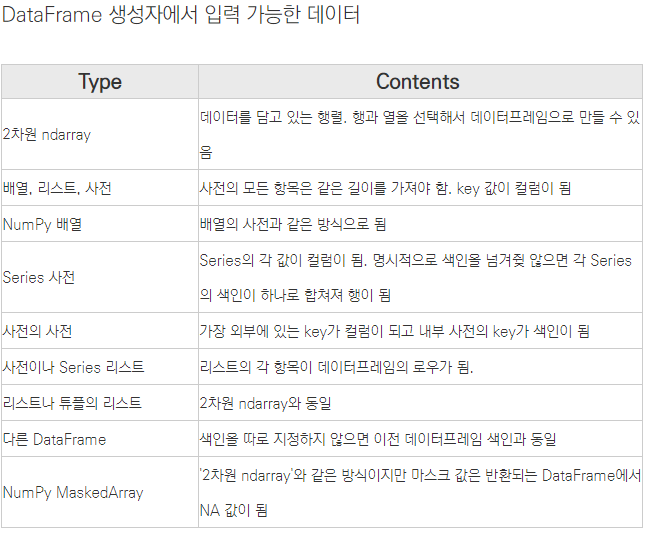

### 5.1.3 Index objects
#### o pandas의 색인객체: 표 형식의 각 로우와 컬럼에 대한 이름과 다른 메타데이터를 저장하는 객체
#### o Series 나 DataFrame 객체생성시의 배열: 내부적인 색인으로 변환

In [402]:
obj = Series(range(3), index=['a', 'b', 'c'])
index = obj.index
index

Index(['a', 'b', 'c'], dtype='object')

In [403]:
index[1:]

Index(['b', 'c'], dtype='object')

##### o index는 변경될 수 없음 (아래와 같이 변경시도시 에러 발생) 

In [404]:
index[1] = 'd'

TypeError: Index does not support mutable operations

#### o SubClasses of Index Class 
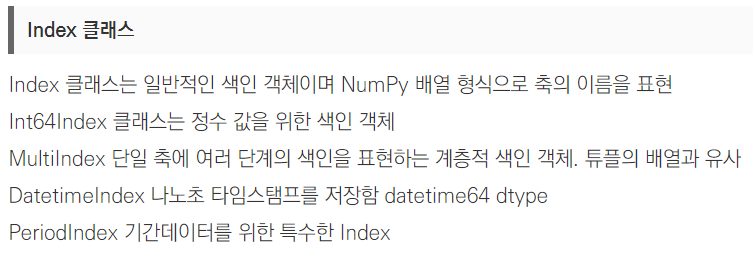

In [11]:
index = pd.Index(np.arange(3))
obj2 = Series([1.5, -2.5, 0], index=index)
obj2.index is index

True

In [4]:
obj2.index

Int64Index([0, 1, 2], dtype='int64')

In [7]:
frame3

,Nevada,Ohio
2001,2.4,1.7
2002,2.9,3.6
2000,NaN,1.5


In [8]:
'Ohio' in frame3.columns

True

In [9]:
2003 in frame3.index

False

In [15]:
# index에는 동일한 값이 입력될 수 있음. 
index = pd.Index([1,1,1])
obj4 = Series([1.5, -2.5, 0], index=index)
obj4

1    1.5
1   -2.5
1    0.0
dtype: float64

#### o 색인 메쏘드와 속성: 
#### (참고) https://pandas.pydata.org/docs/reference/api/pandas.Index.html?highlight=index#pandas.Index
##### - append: 추가적인 Index 객체를 붙여 새로운 색인을 반환
##### - diff: 색인의 차집합 반환
##### - intersection: 색인의 교집합 반환
##### - union: 색인의 합집합 반환
##### - isin: 넘겨받은 값이 해당 색인 위치에 존재하는가?
##### - delete: i 위치의 색인이 삭제된 새로운 색인을 반환
##### - drop: 넘겨받은 값이 삭제된 새로운 색인 반환
##### - insert: i 위치에 추가된 새로운 색인을 반환
##### - is_monotonic: 색인이 단조성을 갖는가?
##### - is_unique: 중복되는 색인이 없다면 TRUE 반환
##### - unique: 색인에서 중복되는 요소를 제거하고 반환

## 5.2 Essential functionality

### 5.2.1 Reindexing
#### o 색인에 맞게 재배열하고 없다면 빈값으로 추가하거나 fill_value의 지정값으로 채움 (디폴트: return new object)
#### (참고) https://pandas.pydata.org/docs/reference/api/pandas.Series.reindex.html?highlight=series%20reindex#pandas.Series.reindex

In [16]:
obj = Series([4.5, 7.2, -5.3, 3.6], index=['d', 'b', 'a', 'c'])
obj

d    4.5
b    7.2
a   -5.3
c    3.6
dtype: float64

In [17]:
obj2 = obj.reindex(['a', 'b', 'c', 'd', 'e'])
obj2

a   -5.3
b    7.2
c    3.6
d    4.5
e    NaN
dtype: float64

In [18]:
obj.reindex(['a', 'b', 'c', 'd', 'e'], fill_value=0)

a   -5.3
b    7.2
c    3.6
d    4.5
e    0.0
dtype: float64

##### o method를 활용한 reindex 
###### - ffill or pad: 앞의 값으로 누락된 값을 채움
###### - bfill or backfill: 뒤의 값으로 누락된 값을 채움

In [19]:
obj3 = Series(['blue', 'purple', 'yellow'], index=[0, 2, 4])
obj3

0      blue
2    purple
4    yellow
dtype: object

In [20]:
obj3.reindex(range(6), method='bfill')

0      blue
1    purple
2    purple
3    yellow
4    yellow
5       NaN
dtype: object

In [21]:
obj1 = Series(['sonata', 'grandure', 'genesis'], index=[0, 3, 4])
obj2 = obj1.reindex(range(5), method='ffill')
print(obj2)

0      sonata
1      sonata
2      sonata
3    grandure
4     genesis
dtype: object


In [22]:
obj4 = obj3.reindex(range(5), method='ffill')
print(obj4)

0      blue
1      blue
2    purple
3    purple
4    yellow
dtype: object


##### o 로우 또는 컬럼을 모두 변경하는 것도 가능

In [23]:
frame = DataFrame(np.arange(9).reshape((3, 3)), index=['a', 'c', 'd'],
                  columns=['Ohio', 'Texas', 'California'])
frame

,Ohio,Texas,California
a,0,1,2
c,3,4,5
d,6,7,8


In [24]:
frame2 = frame.reindex(['a', 'b', 'c', 'd'])
frame2

,Ohio,Texas,California
a,0.0,1.0,2.0
b,NaN,NaN,NaN
c,3.0,4.0,5.0
d,6.0,7.0,8.0


In [25]:
states = ['Texas', 'Utah', 'California']
frame.reindex(columns=states)

,Texas,Utah,California
a,1,NaN,2
c,4,NaN,5
d,7,NaN,8


#####    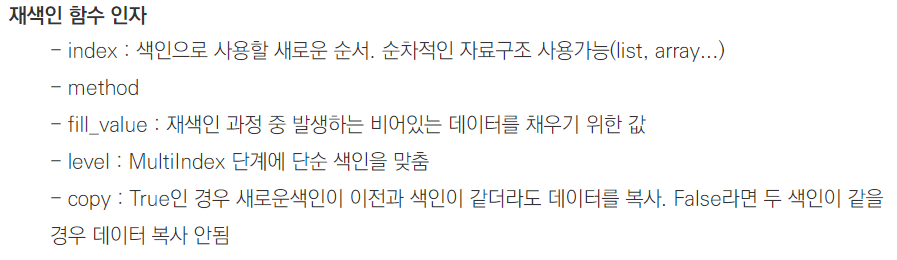
    

### 5.2.2 Dropping entries from an axis

In [26]:
obj = Series(np.arange(5.), index=['a', 'b', 'c', 'd', 'e'])
obj

a    0.0
b    1.0
c    2.0
d    3.0
e    4.0
dtype: float64

In [27]:
new_obj = obj.drop('c')
new_obj

a    0.0
b    1.0
d    3.0
e    4.0
dtype: float64

In [28]:
obj.drop(['d', 'c'])

a    0.0
b    1.0
e    4.0
dtype: float64

In [29]:
data = DataFrame(np.arange(16).reshape((4, 4)),
                 index=['Ohio', 'Colorado', 'Utah', 'New York'],
                 columns=['one', 'two', 'three', 'four'])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [30]:
data.drop(['Colorado', 'Ohio'])

,one,two,three,four
Utah,8,9,10,11
New York,12,13,14,15


In [34]:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html?highlight=dataframe%20drop#pandas.DataFrame.drop
# (default) inplace = False 
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [31]:
data.drop('two', axis=1)

,one,three,four
Ohio,0,2,3
Colorado,4,6,7
Utah,8,10,11
New York,12,14,15


In [35]:
data.drop(['two', 'four'], axis=1)

,one,three
Ohio,0,2
Colorado,4,6
Utah,8,10
New York,12,14


In [36]:
obj1 = Series(['sonata', 'grandure', 'genesis'], index=[0, 3, 4])
obj2 = obj1.reindex(range(5), method='ffill')
print(obj2[1:4])     # (1) 
obj3 = obj2.drop([1,3])
print(obj3)

1      sonata
2      sonata
3    grandure
dtype: object
0     sonata
2     sonata
4    genesis
dtype: object


### 5.2.3 Indexing, selection, and filtering
#### o Series의 NumPy와 다른점
##### - Series는 번호가 아닌 것으로도 색인도 가능: 문자, 조건, 리스트 등

In [37]:
obj = Series(np.arange(4.), index=['a', 'b', 'c', 'd'])
obj['b']

1.0

In [38]:
obj[1]

1.0

In [39]:
obj[2:4]

c    2.0
d    3.0
dtype: float64

In [40]:
obj[['b', 'a', 'd']]

b    1.0
a    0.0
d    3.0
dtype: float64

In [42]:
print(obj)
obj[[1, 3]]

a    0.0
b    1.0
c    2.0
d    3.0
dtype: float64


b    1.0
d    3.0
dtype: float64

In [43]:
obj<2

a     True
b     True
c    False
d    False
dtype: bool

In [44]:
obj[obj < 2]

a    0.0
b    1.0
dtype: float64

##### - 주의: 문자 슬라이싱은 stop을 포함한다. 

In [45]:
obj['b':'c']

b    1.0
c    2.0
dtype: float64

In [46]:
obj['b':'c'] = 5
obj

a    0.0
b    5.0
c    5.0
d    3.0
dtype: float64

In [47]:
data = DataFrame(np.arange(16).reshape((4, 4)),
                 index=['Ohio', 'Colorado', 'Utah', 'New York'],
                 columns=['one', 'two', 'three', 'four'])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [48]:
data['two']

Ohio         1
Colorado     5
Utah         9
New York    13
Name: two, dtype: int32

In [49]:
data[['three', 'one']]

,three,one
Ohio,2,0
Colorado,6,4
Utah,10,8
New York,14,12


In [58]:
# 숫자 슬라이싱은 행을 의미
data[1:2]

,one,two,three,four
Colorado,4,5,6,7


In [61]:
# 다음은 에러를 발생한다. 값을 하나 줄 경우에는 보통 컬럼으로 해석하는데, 컬럼 1은 없다.
data[1]

KeyError: 1

In [69]:
# DF에서 index의 값을 그대로 쓰면 에러발생: 하나만 쓰는 것은 컬럼을 의미 
data['Ohio']
# 다음은 에러가 발생하지 않음. 
# data['two'] 

KeyError: 'Ohio'

In [54]:
data[data['three'] > 5]

,one,two,three,four
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [9]:
data < 5

,one,two,three,four
Ohio,True,True,True,True
Colorado,True,False,False,False
Utah,False,False,False,False
New York,False,False,False,False


In [10]:
data[data < 5] = 0

In [11]:
data

,one,two,three,four
Ohio,0,0,0,0
Colorado,0,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


#### o loc를 이용해 Label로 row와 컬럼을 모두 색인가능 
(참고) https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html?highlight=dataframe%20loc#pandas.DataFrame.loc

In [12]:
data.loc['Colorado', ['two', 'three']]

two      5
three    6
Name: Colorado, dtype: int32

#### o iloc을 이용하면 숫자를 이용해 비슷하게 할 수 있다. 
(참고) https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html?highlight=dataframe%20iloc#pandas.DataFrame.iloc

In [14]:
data.iloc[2, [3, 0, 1]]

four    11
one      8
two      9
Name: Utah, dtype: int32

In [15]:
data.iloc[2]

one       8
two       9
three    10
four     11
Name: Utah, dtype: int32

In [16]:
data.iloc[[1,2],[3,0,1]]

,four,one,two
Colorado,7,0,5
Utah,11,8,9


#### o loc, iloc의 슬라이싱 지원 

In [17]:
data.loc[:'Utah', 'two']

Ohio        0
Colorado    5
Utah        9
Name: two, dtype: int32

In [20]:
data.iloc[:, :3]

,one,two,three
Ohio,0,0,0
Colorado,0,5,6
Utah,8,9,10
New York,12,13,14


In [21]:
data[data>=10]=9
data

,one,two,three,four
Ohio,0,0,0,0
Colorado,0,5,6,7
Utah,8,9,9,9
New York,9,9,9,9


##### 표 5-4 DataFrame의 값 선택하기 
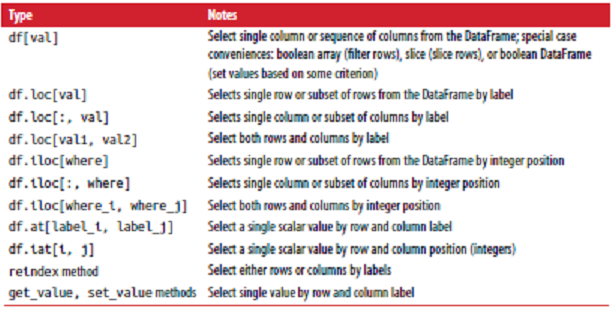

## 토론 5.2.3 (prob_5.2.3) 

### 5.2.4 Arithmetic and data alignment
#### o 색인이 다른 객체간의 산술 연산: 짝이 맞지 않으면 두 색인 통합된다. 

In [70]:
s1 = Series([7.3, -2.5, 3.4, 1.5], index=['a', 'c', 'd', 'e'])
s2 = Series([-2.1, 3.6, -1.5, 4, 3.1], index=['a', 'c', 'e', 'f', 'g'])

In [71]:
s1

a    7.3
c   -2.5
d    3.4
e    1.5
dtype: float64

In [72]:
s2

a   -2.1
c    3.6
e   -1.5
f    4.0
g    3.1
dtype: float64

In [73]:
s1 + s2

a    5.2
c    1.1
d    NaN
e    0.0
f    NaN
g    NaN
dtype: float64

In [74]:
df1 = DataFrame(np.arange(9.).reshape((3, 3)), columns=list('bcd'),
                index=['Ohio', 'Texas', 'Colorado'])
df2 = DataFrame(np.arange(12.).reshape((4, 3)), columns=list('bde'),
                index=['Utah', 'Ohio', 'Texas', 'Oregon'])
df1

,b,c,d
Ohio,0.0,1.0,2.0
Texas,3.0,4.0,5.0
Colorado,6.0,7.0,8.0


In [75]:
df2

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [76]:
df1 + df2

,b,c,d,e
Colorado,NaN,NaN,NaN,NaN
Ohio,3.0,NaN,6.0,NaN
Oregon,NaN,NaN,NaN,NaN
Texas,9.0,NaN,12.0,NaN
Utah,NaN,NaN,NaN,NaN


#### o 산술연산 메쏘드에 채워 넣을 값 지정하기

In [77]:
df1 = DataFrame(np.arange(12.).reshape((3, 4)), columns=list('abcd'))
df2 = DataFrame(np.arange(20.).reshape((4, 5)), columns=list('abcde'))
df1

,a,b,c,d
0,0.0,1.0,2.0,3.0
1,4.0,5.0,6.0,7.0
2,8.0,9.0,10.0,11.0


In [78]:
df2

,a,b,c,d,e
0,0.0,1.0,2.0,3.0,4.0
1,5.0,6.0,7.0,8.0,9.0
2,10.0,11.0,12.0,13.0,14.0
3,15.0,16.0,17.0,18.0,19.0


In [79]:
df1 + df2

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,NaN
1,9.0,11.0,13.0,15.0,NaN
2,18.0,20.0,22.0,24.0,NaN
3,NaN,NaN,NaN,NaN,NaN


In [80]:
df1.add(df2, fill_value=0)

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,4.0
1,9.0,11.0,13.0,15.0,9.0
2,18.0,20.0,22.0,24.0,14.0
3,15.0,16.0,17.0,18.0,19.0


In [81]:
df1.reindex(columns=df2.columns, fill_value=0)

,a,b,c,d,e
0,0.0,1.0,2.0,3.0,0
1,4.0,5.0,6.0,7.0,0
2,8.0,9.0,10.0,11.0,0


#### o Operations between DataFrame and Series

##### - ndarray의 사칙연산 : Broadcasting 적용됨 

In [4]:
arr = np.arange(12.).reshape((3, 4))
arr

array([[ 0.,  1.,  2.,  3.],
       [ 4.,  5.,  6.,  7.],
       [ 8.,  9., 10., 11.]])

In [5]:
arr[0]

array([0., 1., 2., 3.])

In [6]:
arr - arr[0]

array([[0., 0., 0., 0.],
       [4., 4., 4., 4.],
       [8., 8., 8., 8.]])

In [7]:
frame = DataFrame(np.arange(12.).reshape((4, 3)), columns=list('bde'),
                  index=['Utah', 'Ohio', 'Texas', 'Oregon'])
series = frame.iloc[0]
frame

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [8]:
series

b    0.0
d    1.0
e    2.0
Name: Utah, dtype: float64

In [39]:
frame - series

,b,d,e
Utah,0.0,0.0,0.0
Ohio,3.0,3.0,3.0
Texas,6.0,6.0,6.0
Oregon,9.0,9.0,9.0


In [40]:
series2 = Series(range(3), index=['b', 'e', 'f'])
frame + series2

,b,d,e,f
Utah,0.0,NaN,3.0,NaN
Ohio,3.0,NaN,6.0,NaN
Texas,6.0,NaN,9.0,NaN
Oregon,9.0,NaN,12.0,NaN


In [41]:
series3 = frame['d']
frame

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [ ]:
series3

In [ ]:
frame.sub(series3, axis=0)

### (토론 5.2.5) prob_5.2.5.ipynb

### 5.2.6 함수의 적용과 매핑
#### o pandas 객체에도 NumPy의 유니버설 함수 적용 가능 

In [33]:
frame = DataFrame(np.random.randn(4, 3), columns=list('bde'),
                  index=['Utah', 'Ohio', 'Texas', 'Oregon'])

In [34]:
frame

,b,d,e
Utah,-0.204708,0.478943,-0.519439
Ohio,-0.555730,1.965781,1.393406
Texas,0.092908,0.281746,0.769023
Oregon,1.246435,1.007189,-1.296221


In [35]:
np.abs(frame)

,b,d,e
Utah,0.204708,0.478943,0.519439
Ohio,0.555730,1.965781,1.393406
Texas,0.092908,0.281746,0.769023
Oregon,1.246435,1.007189,1.296221


In [48]:
frame = DataFrame(np.arange(9).reshape(3,3), 
      columns=['A', 'B','C'], index = ['Korea','China','Japan'])
f1 = lambda x: x.max() - x.min()
print(frame.apply(f1, axis=1))           # (1) 
f2 = lambda x: x % 3
frame.applymap(f2)                     # (2) 

Korea    2
China    2
Japan    2
dtype: int64


,A,B,C
Korea,0,1,2
China,0,1,2
Japan,0,1,2


#### o apply이용한 함수 적용

In [45]:
f = lambda x: x.max() - x.min()

In [46]:
frame.apply(f)

A    6
B    6
C    6
dtype: int64

In [47]:
frame.apply(f, axis=1)

Korea    2
China    2
Japan    2
dtype: int64

##### - apply에 입력함수는 Series 혹은 여러값을 반환할 수 있음. 

In [ ]:
def f(x):
    return Series([x.min(), x.max()], index=['min', 'max'])
frame.apply(f)

#### o dataframe.applymap():  dataframe 각 원소에 함수 적용

In [ ]:
format = lambda x: '%.2f' % x
frame.applymap(format)

#### o Series.map(): dataframe 각 원소에 함수 적용 -> dataframe.applymap()이 활용

In [ ]:
frame['e'].map(format)

### 5.2.6 Sorting and ranking
#### o (Series, DataFrame)의 sort_index 함수: row나 column의 색인에 따라 정리

In [493]:
obj = Series(range(4), index=['d', 'a', 'b', 'c'])
obj

d    0
a    1
b    2
c    3
dtype: int64

In [494]:
obj.sort_index()

a    1
b    2
c    3
d    0
dtype: int64

In [495]:
frame = DataFrame(np.arange(8).reshape((2, 4)), index=['three', 'one'],
                  columns=['d', 'a', 'b', 'c'])
frame

,d,a,b,c
three,0,1,2,3
one,4,5,6,7


In [496]:
frame.sort_index()

,d,a,b,c
one,4,5,6,7
three,0,1,2,3


In [497]:
frame.sort_index(axis=1)

,a,b,c,d
three,1,2,3,0
one,5,6,7,4


In [498]:
frame.sort_index(axis=1, ascending=False)

,d,c,b,a
three,0,3,2,1
one,4,7,6,5


#### o (Series, DataFrame)의 sort_values 함수: 값에 따라 정렬

In [500]:
obj = Series([4, 7, -3, 2])
obj.sort_values()

2   -3
3    2
0    4
1    7
dtype: int64

In [501]:
obj = Series([4, np.nan, 7, np.nan, -3, 2])
obj.sort_values()

4   -3.0
5    2.0
0    4.0
2    7.0
1    NaN
3    NaN
dtype: float64

In [502]:
frame = DataFrame({'b': [4, 7, -3, 2], 'a': [0, 1, 0, 1]})
frame

,a,b
0,0,4
1,1,7
2,0,-3
3,1,2


In [503]:
frame.sort_values(by='b')

,a,b
2,0,-3
3,1,2
0,0,4
1,1,7


In [504]:
frame.sort_values(by=['a', 'b'])

,a,b
2,0,-3
0,0,4
3,1,2
1,1,7


#### o (Series, DataFrame)의 rank() 함수 
 주의: 동률에 대한 처리: 
#### - 파라미터 없는 경우: 평균순위를 이용

In [507]:
obj = Series([7, -5, 7, 4, 2, 0, 4])
obj.rank()

0    6.5
1    1.0
2    6.5
3    4.5
4    3.0
5    2.0
6    4.5
dtype: float64

##### - 파라미터 method='first': 출현 순서에 따라 동률처리

In [509]:
obj.rank(method='first')

0    6.0
1    1.0
2    7.0
3    4.0
4    3.0
5    2.0
6    5.0
dtype: float64

##### - 파라미터  ascending=False: 역순(감소순)으로 
##### - 파라미터 method='max': 큰값 순위로 동률처리

In [511]:
obj.rank(ascending=False, method='max')

0    2.0
1    7.0
2    2.0
3    4.0
4    5.0
5    6.0
6    4.0
dtype: float64

In [512]:
frame = DataFrame({'b': [4.3, 7, -3, 2], 'a': [0, 1, 0, 1],
                   'c': [-2, 5, 8, -2.5]})
frame

,a,b,c
0,0,4.3,-2.0
1,1,7.0,5.0
2,0,-3.0,8.0
3,1,2.0,-2.5


In [515]:
frame.rank(axis=1)

,a,b,c
0,2.0,3.0,1.0
1,1.0,3.0,2.0
2,2.0,1.0,3.0
3,2.0,3.0,1.0


### 5.2.7 중복 색인

In [516]:
obj = Series(range(5), index=['a', 'a', 'b', 'b', 'c'])
obj

a    0
a    1
b    2
b    3
c    4
dtype: int64

In [517]:
obj.index.is_unique

False

In [518]:
obj['a']

a    0
a    1
dtype: int64

In [519]:
obj['c']

4

In [520]:
df = DataFrame(np.random.randn(4, 3), index=['a', 'a', 'b', 'b'])
df

,0,1,2
a,1.824875,-0.997518,0.850591
a,-0.131578,0.912414,0.188211
b,2.169461,-0.114928,2.003697
b,0.029610,0.795253,0.118110


In [521]:
df.loc['b']

,0,1,2
b,2.169461,-0.114928,2.003697
b,0.029610,0.795253,0.118110


##### - 참고) loc, iloc  - https://www.shanelynn.ie/select-pandas-dataframe-rows-and-columns-using-iloc-loc-and-ix/

## 5.3 기술통계 계산과 요약

In [522]:
df = DataFrame([[1.4, np.nan], [7.1, -4.5],
                [np.nan, np.nan], [0.75, -1.3]],
               index=['a', 'b', 'c', 'd'],
               columns=['one', 'two'])
df

,one,two
a,1.40,NaN
b,7.10,-4.5
c,NaN,NaN
d,0.75,-1.3


In [523]:
df.sum()

one    9.25
two   -5.80
dtype: float64

In [524]:
df.sum(axis=1)

a    1.40
b    2.60
c    0.00
d   -0.55
dtype: float64

In [525]:
df.mean(axis=1, skipna=False)

a      NaN
b    1.300
c      NaN
d   -0.275
dtype: float64

##### - 축소 메쏘드 옵션
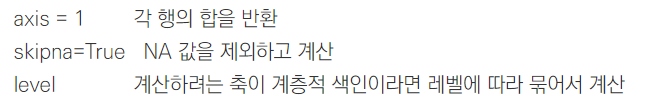

##### - idxmin(), idxmax(): 최소값/최대값을 갖는 인덱스 값 반환

In [527]:
df.idxmax()

one    b
two    d
dtype: object

In [528]:
df.cumsum()

,one,two
a,1.40,NaN
b,8.50,-4.5
c,NaN,NaN
d,9.25,-5.8


In [530]:
df.describe()

,one,two
count,3.000000,2.000000
mean,3.083333,-2.900000
std,3.493685,2.262742
min,0.750000,-4.500000
25%,1.075000,-3.700000
50%,1.400000,-2.900000
75%,4.250000,-2.100000
max,7.100000,-1.300000


In [532]:
obj = Series(['a', 'a', 'b', 'c'] * 4)
obj.describe()

count     16
unique     3
top        a
freq       8
dtype: object

##### 기술통계와 요약통계
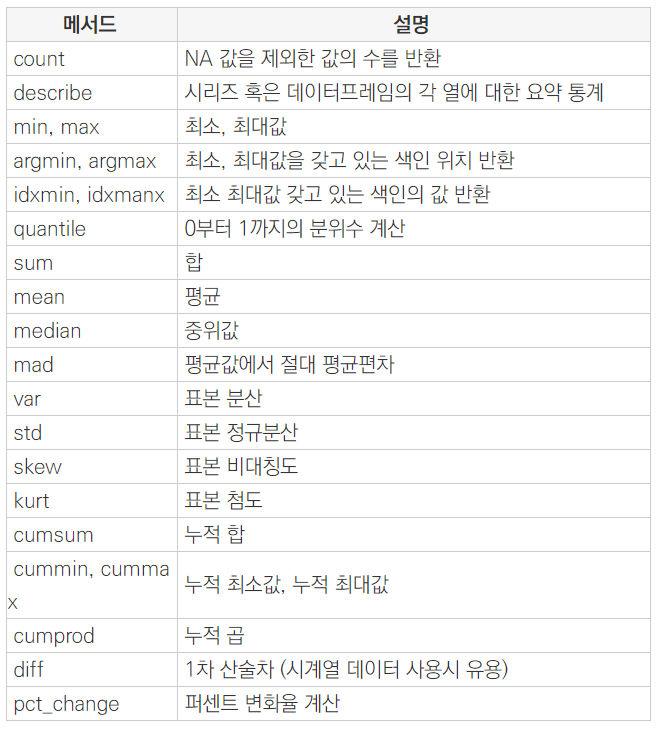

### 5.3.1 상관관계와 공분산(Correlation and covariance)

1. Anaconda Prompt를 관리자모드로 실행
   (base) > conda install pandas-datareader <enter>
2. Yahoo remote data service를 이용하여 주가 데이터 얻기
참고) http://pandas-datareader.readthedocs.io/en/latest/remote_data.html#google-finance"""


In [1]:
"""
1. File->Close and Halt 후에, Anaconda Prompt를 관리자모드로 실행
   (base) > conda install pandas-datareader <enter>
2. google finance remote api 서비스가 불안정하여, 동일한 api 지원하는 quandl 사용
참고) http://pandas-datareader.readthedocs.io/en/latest/remote_data.html#google-finance"""

import numpy as np
import pandas as pd
from pandas import DataFrame, Series 
from pandas_datareader import data # 참고) https://pandas-datareader.readthedocs.io/en/latest/

all_data = {}
for ticker in ['AAPL', 'IBM','GOOG']: # , 'MSFT', 'GOOG','INTC','AMZN'
    all_data[ticker] = data.DataReader(ticker, 'quandl','2015-01-01','2015-12-31')
all_data['AAPL']

ValueError: The Quandl API key must be provided either through the api_key variable or through the environmental variable QUANDL_API_KEY.

In [4]:
all_data['AAPL'].to_csv('ch06/stock_AAPL.csv')
all_data['IBM'].to_csv('ch06/stock_IBM.csv')
all_data['GOOG'].to_csv('ch06/stock_GOOG.csv')

In [6]:
all_data['AAPL'].rolling(window=5).mean()

NameError: name 'Close' is not defined

In [551]:
price =pd.DataFrame({tic: data['Close'] for tic, data in all_data.items()})
volume = DataFrame({tic: data['Volume'] for tic, data in all_data.items()})

In [552]:
# all_data.items()
price.tail()

,AAPL,GOOG,IBM
Date,,,
2015-01-08,111.89,502.68,158.42
2015-01-07,107.75,501.10,155.05
2015-01-06,106.26,501.96,156.07
2015-01-05,106.25,513.87,159.51
2015-01-02,109.33,524.81,162.06


In [553]:
returns = price.pct_change()
returns.tail()

,AAPL,GOOG,IBM
Date,,,
2015-01-08,-0.001071,0.013121,-0.004337
2015-01-07,-0.037001,-0.003143,-0.021273
2015-01-06,-0.013828,0.001716,0.006579
2015-01-05,-0.000094,0.023727,0.022041
2015-01-02,0.028988,0.021289,0.015986


In [554]:
returns.AAPL.corr(returns.IBM)

0.7579301747664372

In [555]:
returns.AAPL.cov(returns.IBM)

0.00031238242733229487

In [556]:
returns.corr()

,AAPL,GOOG,IBM
AAPL,1.000000,0.843192,0.757930
GOOG,0.843192,1.000000,0.823275
IBM,0.757930,0.823275,1.000000


In [557]:
returns.cov()

,AAPL,GOOG,IBM
AAPL,0.000574,0.000239,0.000312
GOOG,0.000239,0.000139,0.000167
IBM,0.000312,0.000167,0.000296


In [558]:
returns.corrwith(returns.IBM)

AAPL    0.757930
GOOG    0.823275
IBM     1.000000
dtype: float64

In [559]:
returns.corrwith(volume)

AAPL    0.380188
GOOG   -0.334004
IBM     0.411150
dtype: float64

### 5.3.2 유일값, 값세기, 멤버쉽 (Unique values, value counts, and membership)

In [560]:
obj = Series(['c', 'a', 'd', 'a', 'a', 'b', 'b', 'c', 'c'])

In [561]:
uniques = obj.unique()
uniques

array(['c', 'a', 'd', 'b'], dtype=object)

In [562]:
obj.value_counts()

a    3
c    3
b    2
d    1
dtype: int64

In [563]:
pd.value_counts(obj.values, sort=False)

c    3
b    2
a    3
d    1
dtype: int64

In [565]:
mask = obj.isin(['b', 'c'])
mask

0     True
1    False
2    False
3    False
4    False
5     True
6     True
7     True
8     True
dtype: bool

In [566]:
obj[mask]

0    c
5    b
6    b
7    c
8    c
dtype: object

In [55]:
a = [1,2,3]
b = [4,5,6]
z1 = list(zip(a,b))
z2 = list(zip(*z1))
print(z2)

[(1, 2, 3), (4, 5, 6)]

In [568]:
data = DataFrame({'Qu1': [1, 3, 4, 3, 4],
                  'Qu2': [2, 3, 1, 2, 3],
                  'Qu3': [1, 5, 2, 4, 4]})
data

,Qu1,Qu2,Qu3
0,1,2,1
1,3,3,5
2,4,1,2
3,3,2,4
4,4,3,4


In [571]:
result = data.apply(pd.value_counts).fillna(0)
result

,Qu1,Qu2,Qu3
1,1.0,1.0,1.0
2,0.0,2.0,1.0
3,2.0,2.0,0.0
4,2.0,0.0,2.0
5,0.0,0.0,1.0


## 5.4 누락된 데이터 처리하기 (Handling missing data) 

In [572]:
string_data = Series(['aardvark', 'artichoke', np.nan, 'avocado'])
string_data

0     aardvark
1    artichoke
2          NaN
3      avocado
dtype: object

In [573]:
string_data.isnull()

0    False
1    False
2     True
3    False
dtype: bool

In [574]:
string_data[0] = None
string_data.isnull()

0     True
1    False
2     True
3    False
dtype: bool

### 5.4.1 누락된 데이터 골라내기 (Filtering out missing data)

##### o Series 에서

In [575]:
from numpy import nan as NA
data = Series([1, NA, 3.5, NA, 7])
data.dropna()

0    1.0
2    3.5
4    7.0
dtype: float64

In [576]:
data[data.notnull()]

0    1.0
2    3.5
4    7.0
dtype: float64

##### o DataFrame 에서

In [578]:
data = DataFrame([[1., 6.5, 3.], [1., NA, NA],
                  [NA, NA, NA], [NA, 6.5, 3.]])
cleaned = data.dropna()
data

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [579]:
cleaned

,0,1,2
0,1.0,6.5,3.0


In [580]:
data.dropna(how='all')

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
3,NaN,6.5,3.0


In [581]:
data[4] = NA
data

,0,1,2,4
0,1.0,6.5,3.0,NaN
1,1.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,6.5,3.0,NaN


In [582]:
data.dropna(axis=1, how='all')

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [584]:
df = DataFrame(np.random.randn(7, 3))
df.iloc[:4, 1] = NA; df.iloc[:2, 2] = NA
df

,0,1,2
0,0.669158,NaN,NaN
1,-1.166832,NaN,NaN
2,-0.274569,NaN,0.107657
3,-0.606545,NaN,-0.017007
4,-1.224145,-1.800840,1.634736
5,0.989008,0.457940,0.555154
6,1.306720,-0.440554,-0.301350


##### - thresh: require that many non-NA values

In [586]:
df.dropna(thresh=2)

,0,1,2
2,-0.274569,NaN,0.107657
3,-0.606545,NaN,-0.017007
4,-1.224145,-1.800840,1.634736
5,0.989008,0.457940,0.555154
6,1.306720,-0.440554,-0.301350


### 5.4.2 Filling in missing data

In [587]:
df.fillna(0)

,0,1,2
0,0.669158,0.000000,0.000000
1,-1.166832,0.000000,0.000000
2,-0.274569,0.000000,0.107657
3,-0.606545,0.000000,-0.017007
4,-1.224145,-1.800840,1.634736
5,0.989008,0.457940,0.555154
6,1.306720,-0.440554,-0.301350


In [588]:
df

,0,1,2
0,0.669158,NaN,NaN
1,-1.166832,NaN,NaN
2,-0.274569,NaN,0.107657
3,-0.606545,NaN,-0.017007
4,-1.224145,-1.800840,1.634736
5,0.989008,0.457940,0.555154
6,1.306720,-0.440554,-0.301350


In [589]:
df.fillna({1: 0.5, 2: -1})

,0,1,2
0,0.669158,0.500000,-1.000000
1,-1.166832,0.500000,-1.000000
2,-0.274569,0.500000,0.107657
3,-0.606545,0.500000,-0.017007
4,-1.224145,-1.800840,1.634736
5,0.989008,0.457940,0.555154
6,1.306720,-0.440554,-0.301350


In [590]:
# always returns a reference to the filled object
_ = df.fillna(0, inplace=True)   # _ : 1) placeholder 2) stores previous output 
            # inplace=TRUE : self 객체를 수정, fillna 는 새로운객체 리턴이 디폴트임 
df     

,0,1,2
0,0.669158,0.000000,0.000000
1,-1.166832,0.000000,0.000000
2,-0.274569,0.000000,0.107657
3,-0.606545,0.000000,-0.017007
4,-1.224145,-1.800840,1.634736
5,0.989008,0.457940,0.555154
6,1.306720,-0.440554,-0.301350


In [591]:
df = DataFrame(np.random.randn(6, 3))
df.iloc[2:, 1] = NA; df.iloc[4:, 2] = NA # df.ix[2:, 1] = NA; df.ix[4:, 2] = NA : ix는 없어질 예정이라 iloc사용
df

,0,1,2
0,0.498791,-0.823991,1.320566
1,0.507965,-0.653438,0.186980
2,-0.391725,NaN,-0.017141
3,0.680321,NaN,-0.757177
4,0.718086,NaN,NaN
5,0.426986,NaN,NaN


In [592]:
df

,0,1,2
0,0.498791,-0.823991,1.320566
1,0.507965,-0.653438,0.186980
2,-0.391725,NaN,-0.017141
3,0.680321,NaN,-0.757177
4,0.718086,NaN,NaN
5,0.426986,NaN,NaN


In [593]:
df.fillna(method='ffill')

,0,1,2
0,0.498791,-0.823991,1.320566
1,0.507965,-0.653438,0.186980
2,-0.391725,-0.653438,-0.017141
3,0.680321,-0.653438,-0.757177
4,0.718086,-0.653438,-0.757177
5,0.426986,-0.653438,-0.757177


In [594]:
df.fillna(method='ffill', limit=2) # limit : na를 채워넣을 최대 수

,0,1,2
0,0.498791,-0.823991,1.320566
1,0.507965,-0.653438,0.186980
2,-0.391725,-0.653438,-0.017141
3,0.680321,-0.653438,-0.757177
4,0.718086,NaN,-0.757177
5,0.426986,NaN,-0.757177


In [595]:
data = Series([1., NA, 3.5, NA, 7])
data

0    1.0
1    NaN
2    3.5
3    NaN
4    7.0
dtype: float64

In [596]:
data.fillna(data.mean())

0    1.000000
1    3.833333
2    3.500000
3    3.833333
4    7.000000
dtype: float64

## 5.5 Hierarchical indexing
o 개념: 하나의 축에 둘 이상의 색인단계를 지정 

o Multi-Index를 색인으로하는 Series 

In [605]:
data = Series(np.random.randn(10),
              index=[['a', 'a', 'a', 'b', 'b', 'b', 'c', 'c', 'd', 'd'],
                     [1, 2, 3, 1, 2, 3, 1, 2, 2, 3]])
data

a  1   -0.634709
   2   -0.395701
   3   -0.289436
b  1   -0.734297
   2   -0.728505
   3    0.838775
c  1    0.266893
   2    0.721194
d  2    0.910983
   3   -1.020903
dtype: float64

In [606]:
data.index

MultiIndex(levels=[['a', 'b', 'c', 'd'], [1, 2, 3]],
           labels=[[0, 0, 0, 1, 1, 1, 2, 2, 3, 3], [0, 1, 2, 0, 1, 2, 0, 1, 1, 2]])

In [607]:
data['b']

1   -0.734297
2   -0.728505
3    0.838775
dtype: float64

In [608]:
data['b':'c']

b  1   -0.734297
   2   -0.728505
   3    0.838775
c  1    0.266893
   2    0.721194
dtype: float64

In [609]:
data.loc[['b', 'd']] #data.ix[['b', 'd']]

b  1   -0.734297
   2   -0.728505
   3    0.838775
d  2    0.910983
   3   -1.020903
dtype: float64

In [610]:
data[:, 2]

a   -0.395701
b   -0.728505
c    0.721194
d    0.910983
dtype: float64

#### o DataFrame.unstack() 
##### - Pivot index (default=-1, inner most)를 inner most column으로 pivot 전환  
참고) https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html


In [611]:
data

a  1   -0.634709
   2   -0.395701
   3   -0.289436
b  1   -0.734297
   2   -0.728505
   3    0.838775
c  1    0.266893
   2    0.721194
d  2    0.910983
   3   -1.020903
dtype: float64

In [614]:
data.unstack()

,1,2,3
a,-0.634709,-0.395701,-0.289436
b,-0.734297,-0.728505,0.838775
c,0.266893,0.721194,NaN
d,NaN,0.910983,-1.020903


##### - Pivot index가 다차원이 아닐 경우, Series를 return 

In [618]:
df=data.unstack()
df.unstack()

1  a   -0.634709
   b   -0.734297
   c    0.266893
   d         NaN
2  a   -0.395701
   b   -0.728505
   c    0.721194
   d    0.910983
3  a   -0.289436
   b    0.838775
   c         NaN
   d   -1.020903
dtype: float64

#### o DataFrame.stack() 
o 컬럼 (default=-1, inner most)을  inner most index 로 pivot 전환 
참고) https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html

In [619]:
data.unstack().stack()

a  1   -0.634709
   2   -0.395701
   3   -0.289436
b  1   -0.734297
   2   -0.728505
   3    0.838775
c  1    0.266893
   2    0.721194
d  2    0.910983
   3   -1.020903
dtype: float64

#### o 인덱스, 컬럼에 다차원 인덱스

In [620]:
frame = DataFrame(np.arange(12).reshape((4, 3)),
                  index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]],
                  columns=[['Ohio', 'Ohio', 'Colorado'],
                           ['Green', 'Red', 'Green']])
frame

Ohio     Colorado
    Green Red    Green
a 1     0   1        2
  2     3   4        5
b 1     6   7        8
  2     9  10       11

##### - 다차원색인에 이름부여, 컬럼 라벨에 이름부여

In [621]:
frame.index.names = ['key1', 'key2']
frame.columns.names = ['state', 'color']
frame

state      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
     2        3   4        5
b    1        6   7        8
     2        9  10       11

In [622]:
frame['Ohio']  #frame.loc['a']

color      Green  Red
key1 key2            
a    1         0    1
     2         3    4
b    1         6    7
     2         9   10

### 5.5.1 계층순서 변경 및 정렬 (Reordering and sorting levels)

In [623]:
frame.swaplevel('key1', 'key2')

state      Ohio     Colorado
color     Green Red    Green
key2 key1                   
1    a        0   1        2
2    a        3   4        5
1    b        6   7        8
2    b        9  10       11

In [626]:
frame.sort_index(level=1)
# 참고) https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_index.html
#frame.sortlevel(1)

state      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
b    1        6   7        8
a    2        3   4        5
b    2        9  10       11

In [627]:
# frame.swaplevel(0, 1).sortlevel(0)
frame.swaplevel(0, 1).sort_index(level=0)

state      Ohio     Colorado
color     Green Red    Green
key2 key1                   
1    a        0   1        2
     b        6   7        8
2    a        3   4        5
     b        9  10       11

### 5.5.2 Summary statistics by level
#### o DataFrame의 통계함수는 (level=None)과 (axis=0)을 지정해, 해당레벨에 맞는 통계를 얻을 수 있음 

In [628]:
frame

state      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
     2        3   4        5
b    1        6   7        8
     2        9  10       11

In [629]:
frame.sum(level='key2')

state  Ohio     Colorado
color Green Red    Green
key2                    
1         6   8       10
2        12  14       16

In [630]:
frame.sum(level='color', axis=1)

color      Green  Red
key1 key2            
a    1         2    1
     2         8    4
b    1        14    7
     2        20   10

### 5.5.3 Using a DataFrame's columns

In [632]:
frame = DataFrame({'a': range(7), 'b': range(7, 0, -1),
                   'c': ['one', 'one', 'one', 'two', 'two', 'two', 'two'],
                   'd': [0, 1, 2, 0, 1, 2, 3]})
frame

,a,b,c,d
0,0,7,one,0
1,1,6,one,1
2,2,5,one,2
3,3,4,two,0
4,4,3,two,1
5,5,2,two,2
6,6,1,two,3


In [633]:
# DataFrame.set_index() : 컬럼을 색인으로,
# 참고) https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.set_index.html
frame2 = frame.set_index(['c', 'd'])
frame2

a  b
c   d      
one 0  0  7
    1  1  6
    2  2  5
two 0  3  4
    1  4  3
    2  5  2
    3  6  1

In [634]:
frame.set_index(['c', 'd'], drop=False)

a  b    c  d
c   d              
one 0  0  7  one  0
    1  1  6  one  1
    2  2  5  one  2
two 0  3  4  two  0
    1  4  3  two  1
    2  5  2  two  2
    3  6  1  two  3

##### - DataFrame.reset_index() : 인덱스를 컬럼으로 이동  
참고) https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.reset_index.html

In [635]:
frame2.reset_index()

,c,d,a,b
0,one,0,0,7
1,one,1,1,6
2,one,2,2,5
3,two,0,3,4
4,two,1,4,3
5,two,2,5,2
6,two,3,6,1


## 5.6 Other pandas topics

### 5.6.1 Integer indexing

In [639]:
ser = Series(np.arange(3.))
#ser[-1] # ser.iloc[-1] # ser[-1]의 -1 이 모호해 에러 발생: 위치색인과 이름색인 중 어느것인가? --> iloc() 사용
ser.iloc[-1]

2.0

In [640]:
ser

0    0.0
1    1.0
2    2.0
dtype: float64

In [642]:
ser2 = Series(np.arange(3.), index=['a', 'b', 'c'])
ser2[-1] # 문자열 색인인 경우, 모호함이 없어 에러 없음.

2.0

In [643]:
ser.ix[:1] # ser.iloc[:1]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


0    0.0
1    1.0
dtype: float64

In [645]:
ser3 = Series(range(3), index=[-5, 1, 3])
ser3.iloc[2]

2

In [646]:
frame = DataFrame(np.arange(6).reshape((3, 2)), index=[2, 0, 1])
frame.iloc[0]

0    0
1    1
Name: 2, dtype: int32

### 5.6.2 Panel data

#### o Panel : DataFrame의 3차원 버전
##### - 생성:DataFrame 객체를 담은 사전 혹은  3차원 ndarray

In [647]:
# import pandas.io.data as web 
# pdata = pd.Panel(dict((stk, web.get_data_yahoo(stk))
#                        for stk in ['AAPL', 'GOOG', 'MSFT', 'DELL']))

# pandas.io.data는 pandas-datareader로 대체 예정
# https://pandas.pydata.org/pandas-docs/stable/remote_data.html
# 주의: quandl 도 일 50회 호출로 제한함. 
import pandas_datareader.data as web
from datetime import datetime
start = datetime(2015, 2, 9)
end = datetime(2017, 5, 24)
# Quanld
# pdata = pd.Panel(dict((stk, web.DataReader(stk, 'quandl','2010-01-01','2010-01-31')) 
#                       for stk in ['WIKI/AAPL', 'WIKI/GOOG', 'WIKI/MSFT', 'WIKI/DELL'])) 
#                       # for stk in ['WIKI/AAPL', 'WIKI/GOOG', 'MSFT', 'DELL'])) 
# IEX
# f = web.DataReader('F', 'iex', start, end)
pdata = pd.Panel(dict((stk, web.DataReader(stk, 'iex',start,end)) 
                      for stk in ['AAPL', 'GOOG', 'MSFT'])) 
pdata

5y
5y
5y


<class 'pandas.core.panel.Panel'>
Dimensions: 3 (items) x 578 (major_axis) x 5 (minor_axis)
Items axis: AAPL to MSFT
Major_axis axis: 2015-02-09 to 2017-05-24
Minor_axis axis: open to volume

In [653]:
pdata['AAPL']
#pdata['Close']

,open,high,low,close,volume
date,,,,,
2015-02-09,112.2075,113.4285,112.0939,113.3149,38889797.0
2015-02-10,113.7408,115.6149,113.7314,115.4919,62008506.0
2015-02-11,116.2017,118.2367,115.9462,118.1989,73561797.0
2015-02-12,119.3157,120.6598,118.8519,119.6943,74474466.0
2015-02-13,120.4705,120.4705,118.9277,120.2812,54272219.0
2015-02-17,120.6692,121.9849,120.1297,120.9910,63152405.0
2015-02-18,120.7970,121.8902,120.6314,121.8287,44891737.0
2015-02-19,121.6063,122.1268,121.4643,121.5779,37362381.0
2015-02-20,121.7388,122.5717,121.1993,122.5670,48948419.0


In [654]:
pdata = pdata.swapaxes('items', 'minor')
# pdata['close']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  """Entry point for launching an IPython kernel.


In [656]:
pdata.ix[:, '2017-05-24', :]

,open,high,low,close,volume
AAPL,152.0692,152.3954,150.9127,151.5750,19219154.0
GOOG,952.9800,955.0900,949.5000,954.9600,1034199.0
MSFT,67.8440,67.8539,67.4303,67.7455,14666865.0


In [657]:
pdata.ix['AAPL', '2017-05-20':, :]

KeyError: 'AAPL'

#### o Panle과 DataFrame 간의 전환: panel.to_frame(), to_panel()

In [658]:
stacked = pdata.ix[:, '2017-05-20':, :].to_frame()
stacked

open      high       low     close      volume
date       minor                                                    
2017-05-22 AAPL   152.2274  152.8007  151.1499  152.2175  22966437.0
           GOOG   935.0000  941.8828  935.0000  941.8600   1120385.0
           MSFT    66.8786   67.4795   66.4944   67.4303  16237550.0
2017-05-23 AAPL   153.1170  153.1170  151.5453  152.0297  19918871.0
           GOOG   947.9200  951.4666  942.5750  948.8200   1270817.0
           MSFT    67.6962   67.7258   67.3613   67.6568  15425824.0
2017-05-24 AAPL   152.0692  152.3954  150.9127  151.5750  19219154.0
           GOOG   952.9800  955.0900  949.5000  954.9600   1034199.0
           MSFT    67.8440   67.8539   67.4303   67.7455  14666865.0

In [659]:
stacked.to_panel()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  """Entry point for launching an IPython kernel.


<class 'pandas.core.panel.Panel'>
Dimensions: 5 (items) x 3 (major_axis) x 3 (minor_axis)
Items axis: open to volume
Major_axis axis: 2017-05-22 to 2017-05-24
Minor_axis axis: AAPL to MSFT

### 과제: Ch05_